# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [36]:
print(cities)

['pochutla', 'hambantota', 'ribeira grande', 'puerto baquerizo moreno', 'busselton', 'east london', 'cape town', 'cherskiy', 'lompoc', 'fortuna', 'new norfolk', 'hovd', 'rikitea', 'punta arenas', 'barrow', 'bethel', 'clyde river', 'severo-kurilsk', 'ponta do sol', 'buraydah', 'nanortalik', 'touho', 'valreas', 'kosonsoy', 'ushuaia', 'torbay', 'sodertalje', 'port alfred', 'tiksi', 'miltenberg', 'porto novo', 'saint-philippe', 'necochea', 'makakilo city', 'aklavik', 'tuktoyaktuk', 'illoqqortoormiut', 'cabo san lucas', 'hithadhoo', 'tadine', 'along', 'mataura', 'saint george', 'arraial do cabo', 'aksu', 'albany', 'kapaa', 'port macquarie', 'avarua', 'mahebourg', 'san cristobal', 'kavaratti', 'pisco', 'bluff', 'bredasdorp', 'sao joao da barra', 'marawi', 'taolanaro', 'provideniya', 'belushya guba', 'qaanaaq', 'jacareacanga', 'cornelius', 'rungata', 'dikson', 'nongan', 'piranshahr', 'praya', 'atuona', 'hilo', 'khatanga', 'chokurdakh', 'gangotri', 'kenai', 'san policarpo', 'fairbanks', 'georg

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [37]:
print(weather_api_key)

65e67b99df7e4d1a7b6d4e19ea6783d8


In [38]:
#establish base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#build query url
weather_url = base_url + "appid=" + weather_api_key + "&q=" 

#get sample weather of city
samp_weather = requests.get(weather_url + "fortuna").json()
samp_weather


{'coord': {'lon': -124.1573, 'lat': 40.5982},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 287.75,
  'feels_like': 288.45,
  'temp_min': 286.48,
  'temp_max': 288.71,
  'pressure': 1028,
  'humidity': 94},
 'visibility': 8047,
 'wind': {'speed': 0.63, 'deg': 320},
 'clouds': {'all': 90},
 'dt': 1610575097,
 'sys': {'type': 1,
  'id': 4127,
  'country': 'US',
  'sunrise': 1610552323,
  'sunset': 1610586708},
 'timezone': -28800,
 'id': 5563839,
 'name': 'Fortuna',
 'cod': 200}

In [39]:
#set lists
city_name = []
city_id = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

#loop through cities
for city in cities:
    
    #query
    city_data = requests.get(weather_url + city).json()
    
    try:
        city_name.append(city_data['name'])
        city_id.append(city_data["id"])
        latitude.append(city_data['coord']['lat'])
        longitude.append(city_data['coord']['lon'])
        temperature.append(city_data['main']['temp'])
        humidity.append(city_data['main']['humidity'])
        cloudiness.append(city_data['clouds']['all'])
        wind_speed.append(city_data['wind']['speed'])
        
        print(f"{city},{city_data['id']} found! Appending stats")
        
    except:
        #append null
        print(f"{city} not found! NaN")
        pass

pochutla,3517970 found! Appending stats
hambantota,1244926 found! Appending stats
ribeira grande,3372707 found! Appending stats
puerto baquerizo moreno,3652758 found! Appending stats
busselton,2075265 found! Appending stats
east london,1006984 found! Appending stats
cape town,3369157 found! Appending stats
cherskiy,2126199 found! Appending stats
lompoc,5367788 found! Appending stats
fortuna,5563839 found! Appending stats
new norfolk,2155415 found! Appending stats
hovd,1516048 found! Appending stats
rikitea,4030556 found! Appending stats
punta arenas,3874787 found! Appending stats
barrow,5880054 found! Appending stats
bethel,5282297 found! Appending stats
clyde river,5924351 found! Appending stats
severo-kurilsk,2121385 found! Appending stats
ponta do sol,2264557 found! Appending stats
buraydah,107304 found! Appending stats
nanortalik,3421765 found! Appending stats
touho,2137873 found! Appending stats
valreas,2970838 found! Appending stats
kosonsoy,1513714 found! Appending stats
ushuaia

kuruman,986134 found! Appending stats
upernavik,3418910 found! Appending stats
palabuhanratu not found! NaN
mbini,2308278 found! Appending stats
sao filipe,3374210 found! Appending stats
castro,3466704 found! Appending stats
kavieng,2094342 found! Appending stats
sao felix do xingu,3388847 found! Appending stats
hualmay,3939761 found! Appending stats
airai,1651810 found! Appending stats
austin,4671654 found! Appending stats
tandil,3427833 found! Appending stats
altay,1529651 found! Appending stats
paso de carrasco,3441292 found! Appending stats
igarka,1505991 found! Appending stats
kuche not found! NaN
solnechnyy,2016307 found! Appending stats
port hedland,2063042 found! Appending stats
silva jardim,3447591 found! Appending stats
kerema,2094144 found! Appending stats
saint anthony,5044290 found! Appending stats
college,5859699 found! Appending stats
namatanai,2090021 found! Appending stats
samusu not found! NaN
ancud,3899695 found! Appending stats
kandrian,2094746 found! Appending stat

merauke,2082539 found! Appending stats
kaura namoda,2334756 found! Appending stats
olafsvik,3414079 found! Appending stats
marcona not found! NaN
kamiiso,2129766 found! Appending stats
fort nelson,5955902 found! Appending stats
bilibino,2126682 found! Appending stats
conceicao do mato dentro,3465745 found! Appending stats
amapa,3407762 found! Appending stats
alpena,4984075 found! Appending stats
do gonbadan,136014 found! Appending stats
rosetown,6127749 found! Appending stats
dunedin,2191562 found! Appending stats
yaan,2338660 found! Appending stats
bad freienwalde,2953458 found! Appending stats
puerto colombia,3671497 found! Appending stats
gwadar,1177446 found! Appending stats
nampula,1033356 found! Appending stats
pitimbu,3391889 found! Appending stats
sao geraldo do araguaia,3388760 found! Appending stats
santa vitoria do palmar,3449747 found! Appending stats
bonavista,5905393 found! Appending stats
port augusta,2063056 found! Appending stats
ciudad bolivar,3645532 found! Appending

In [40]:
#df
weather_data = pd.DataFrame({"City" : pd.Series(city_name),
            "City ID" : pd.Series(city_id),
            "Latitude" : pd.Series(latitude),
            "Longitude" : pd.Series(longitude),
            "temperature" : pd.Series(temperature),
            "humidity" : pd.Series(humidity),
            "cloudiness" : pd.Series(cloudiness),
            "wind speed" : pd.Series(wind_speed)
            })

weather_data 
        


,City,City ID,Latitude,Longitude,temperature,humidity,cloudiness,wind speed
0,Pochutla,3517970,15.7432,-96.4661,302.09,48,40,5.14
1,Hambantota,1244926,6.1241,81.1185,297.15,100,75,1.54
2,Ribeira Grande,3372707,38.5167,-28.7000,289.15,88,40,4.12
3,Puerto Baquerizo Moreno,3652758,-0.9000,-89.6000,300.15,83,40,7.72
4,Busselton,2075265,-33.6500,115.3333,286.43,71,99,0.89
...,...,...,...,...,...,...,...,...
561,Kyra,2021041,49.5776,111.9753,249.19,81,97,1.52
562,Kaihua,1804874,23.3687,104.2800,277.11,81,20,0.88
563,Carmona,1718307,14.3000,121.0167,296.68,83,20,0.51
564,Prince Rupert,6113406,54.3161,-130.3201,279.45,75,40,4.12


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
# Save the updated dataframe as a csv
weather_data.to_csv("Resources/city_data.csv", encoding="utf-8", index=False)
weather_data.head()

,City,City ID,Latitude,Longitude,temperature,humidity,cloudiness,wind speed
0,Pochutla,3517970,15.7432,-96.4661,302.09,48,40,5.14
1,Hambantota,1244926,6.1241,81.1185,297.15,100,75,1.54
2,Ribeira Grande,3372707,38.5167,-28.7000,289.15,88,40,4.12
3,Puerto Baquerizo Moreno,3652758,-0.9000,-89.6000,300.15,83,40,7.72
4,Busselton,2075265,-33.6500,115.3333,286.43,71,99,0.89


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [42]:
humidity_100 = weather_data.loc[weather_data["humidity"] <100]
humidity_100

,City,City ID,Latitude,Longitude,temperature,humidity,cloudiness,wind speed
0,Pochutla,3517970,15.7432,-96.4661,302.09,48,40,5.14
2,Ribeira Grande,3372707,38.5167,-28.7000,289.15,88,40,4.12
3,Puerto Baquerizo Moreno,3652758,-0.9000,-89.6000,300.15,83,40,7.72
4,Busselton,2075265,-33.6500,115.3333,286.43,71,99,0.89
5,East London,1006984,-33.0153,27.9116,296.09,91,100,6.45
...,...,...,...,...,...,...,...,...
561,Kyra,2021041,49.5776,111.9753,249.19,81,97,1.52
562,Kaihua,1804874,23.3687,104.2800,277.11,81,20,0.88
563,Carmona,1718307,14.3000,121.0167,296.68,83,20,0.51
564,Prince Rupert,6113406,54.3161,-130.3201,279.45,75,40,4.12


In [43]:
#  Get the indices of cities that have humidity over 100%.
#index = humidity_100.index
#index

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#clean_city_data = weather_data.dropna[(weather_data["humidity"] != )]

In [22]:
humidity_100.dtypes

City            object
City ID          int64
Latitude       float64
Longitude      float64
temperature    float64
humidity         int64
cloudiness       int64
wind speed     float64
dtype: object

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

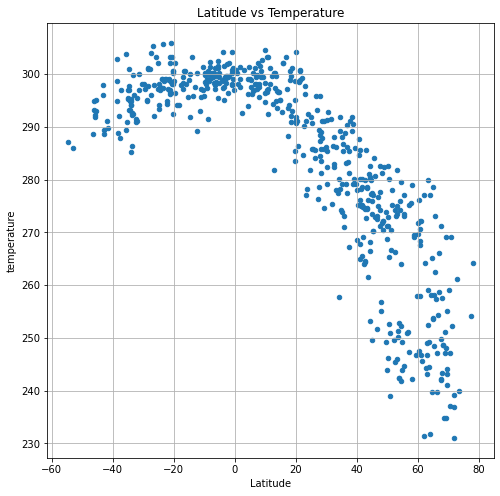

In [44]:
humidity_100.plot(kind="scatter", x="Latitude", y="temperature", grid=True, figsize=(8, 8),
                  title="Latitude vs Temperature")

plt.savefig("Resources/LatvsTemp.png")

## Latitude vs. Humidity Plot

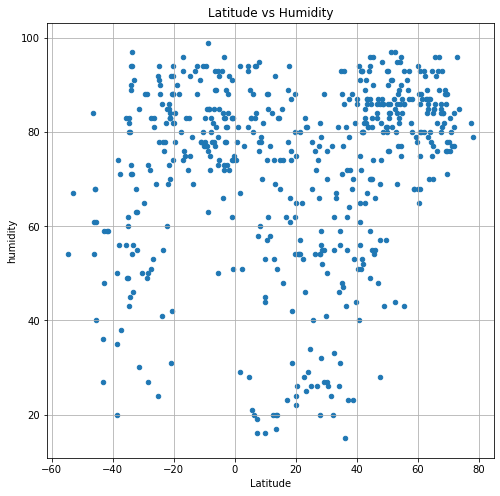

In [49]:
humidity_100.plot(kind="scatter", x="Latitude", y="humidity", grid=True, figsize=(8, 8),
                  title="Latitude vs Humidity")

plt.savefig("Resources/LatvsHumid.png")

## Latitude vs. Cloudiness Plot

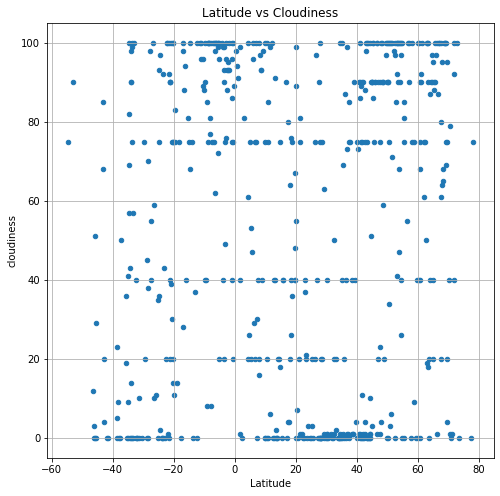

In [50]:
humidity_100.plot(kind="scatter", x="Latitude", y="cloudiness", grid=True, figsize=(8, 8),
                  title="Latitude vs Cloudiness")

plt.savefig("Resources/LatvsCloud.png")

## Latitude vs. Wind Speed Plot

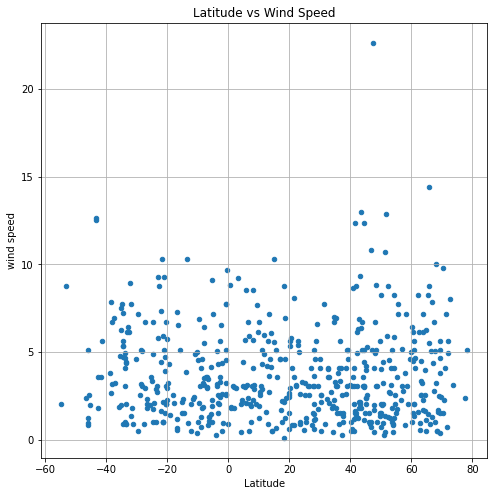

In [51]:
humidity_100.plot(kind="scatter", x="Latitude", y="wind speed", grid=True, figsize=(8, 8),
                  title="Latitude vs Wind Speed")

plt.savefig("Resources/LatvsWind.png")

## Linear Regression

In [48]:
north_hem = humidity_100.loc[humidity_100["Latitude"] >= 0]
south_hem = humidity_100.loc[humidity_100["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7370290358253949


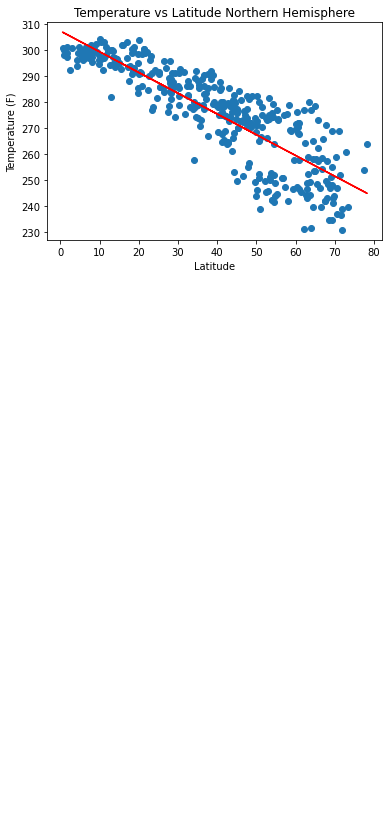

<Figure size 432x288 with 0 Axes>

In [59]:
# Add the linear regression equation and line to plot
x_values = north_hem['Latitude']
y_values = north_hem['temperature']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Latitude Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/North_LatvsTemp_LinReg.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2895834604002358


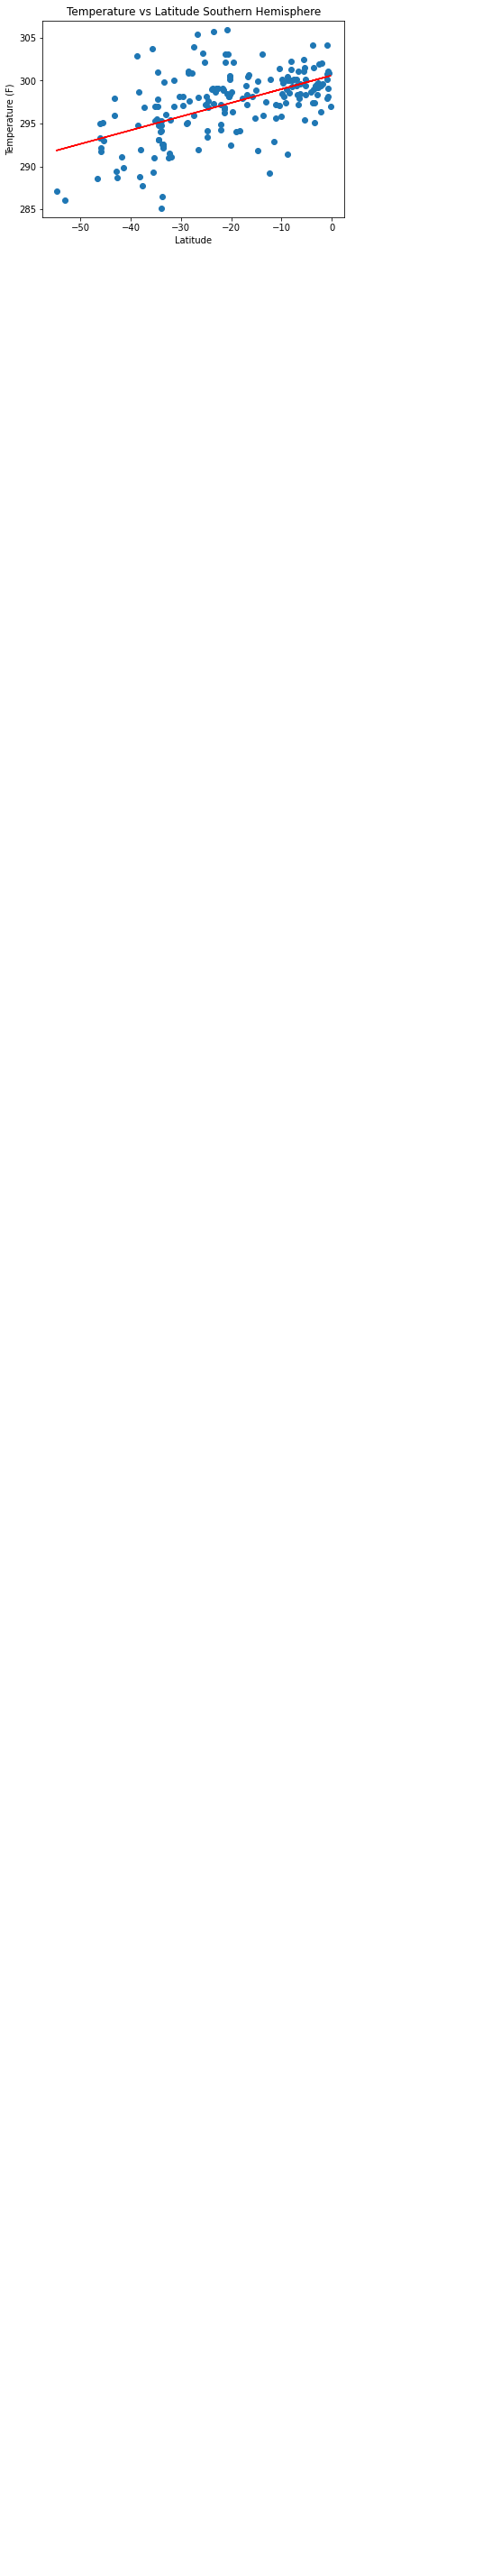

<Figure size 432x288 with 0 Axes>

In [58]:
# Add the linear regression equation and line to plot
x_values = south_hem['Latitude']
y_values = south_hem['temperature']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Latitude Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()


plt.savefig("Resources/South_LatvsTemp_LinReg.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15597876820459136


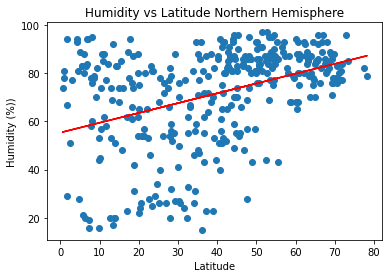

<Figure size 432x288 with 0 Axes>

In [60]:
# Add the linear regression equation and line to plot
x_values = north_hem['Latitude']
y_values = north_hem['humidity']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.title('Humidity vs Latitude Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/North_LatvsHumid_LinReg.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2091487765638731


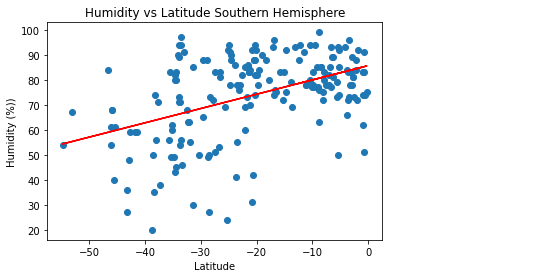

<Figure size 432x288 with 0 Axes>

In [61]:
# Add the linear regression equation and line to plot
x_values = south_hem['Latitude']
y_values = south_hem['humidity']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.title('Humidity vs Latitude Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/South_LatvsHumid_LinReg.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05170049883190792


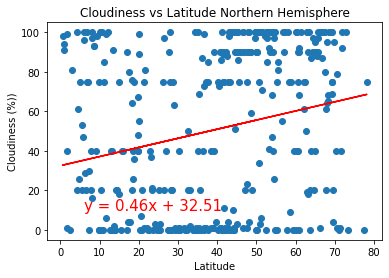

<Figure size 432x288 with 0 Axes>

In [62]:
x_values = north_hem['Latitude']
y_values = north_hem['cloudiness']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.title('Cloudiness vs Latitude Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/North_LatvsCloud_LinReg.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.24174021067942392


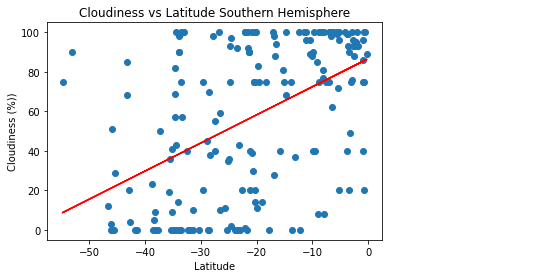

<Figure size 432x288 with 0 Axes>

In [63]:
x_values = south_hem['Latitude']
y_values = south_hem['cloudiness']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.title('Cloudiness vs Latitude Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/South_LatvsCloud_LinReg.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0026578332902271857


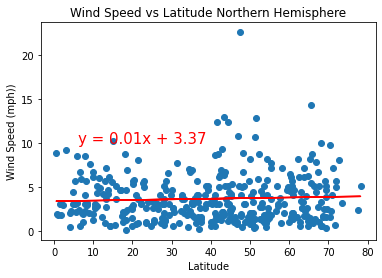

<Figure size 432x288 with 0 Axes>

In [64]:
x_values = north_hem['Latitude']
y_values = north_hem['wind speed']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.title('Wind Speed vs Latitude Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/North_LatvsWind_LinReg.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.021629530817217895


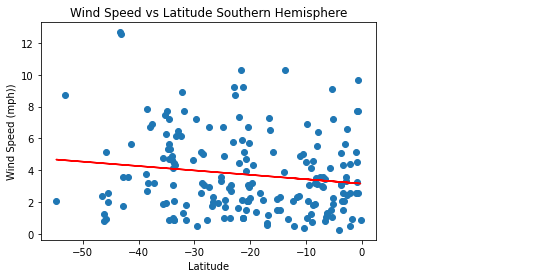

<Figure size 432x288 with 0 Axes>

In [65]:
x_values = south_hem['Latitude']
y_values = south_hem['wind speed']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.title('Wind Speed vs Latitude Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/South_LatvsWind_LinReg.png")